In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [34]:
# Load the dataset
data_path = 'sign_mnist_train.csv'  
data = pd.read_csv(data_path)

In [35]:
# Inspect the dataset
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (27455, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0 

In [36]:
# Extract features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [37]:
# Determine the correct image dimensions
num_features = X.shape[1]
image_size = int(np.sqrt(num_features))  

In [38]:
if image_size * image_size != num_features:
    raise ValueError("The number of features does not match a perfect square, unable to determine image shape")

In [39]:
image_shape = (image_size, image_size, 1)
X = X.reshape(-1, *image_shape)

In [40]:
# Normalize the image data
X = X / 255.0

In [41]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Flatten the images for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

In [43]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [44]:
# Evaluate the model
y_train_pred = svm_model.predict(X_train_flat)
y_val_pred = svm_model.predict(X_val_flat)

In [45]:
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [46]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.42829175013658716
Validation Accuracy: 0.20979785102895648


Predicted Gesture: 211


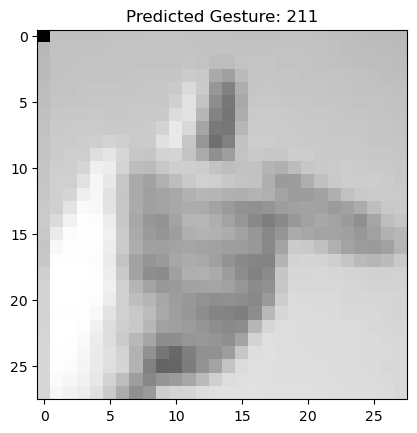

In [49]:
# Function to predict gesture from new image data
def predict_image(new_image_data):
    new_image_data = new_image_data.reshape(1, -6) 
    prediction = svm_model.predict(new_image_data)
    return prediction[0]

# Select an image from validation set
new_image_index = 11
new_image_data = X_val[new_image_index]

# Predict the gesture for the new image
predicted_gesture = predict_image(new_image_data)

# Print the predicted gesture
print(f"Predicted Gesture: {predicted_gesture}")

# Display the new image
plt.imshow(new_image_data.reshape(image_size, image_size), cmap='gray')
plt.title(f"Predicted Gesture: {predicted_gesture}")
plt.show()